Notebook Setup


In [ ]:
!which python

/usr/local/bin/python


In [1]:
#Standard imports
import os
#Third party imports
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Local imports

In [3]:
import pandas as pd

df = pd.read_csv(r"datasets/Salary_dataset.csv")
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape

(30, 3)

In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


## What problem are we trying to solve ?

We are trying to predict the salary based on the years of experience an individual has . Therefore ,this is a regression problem.

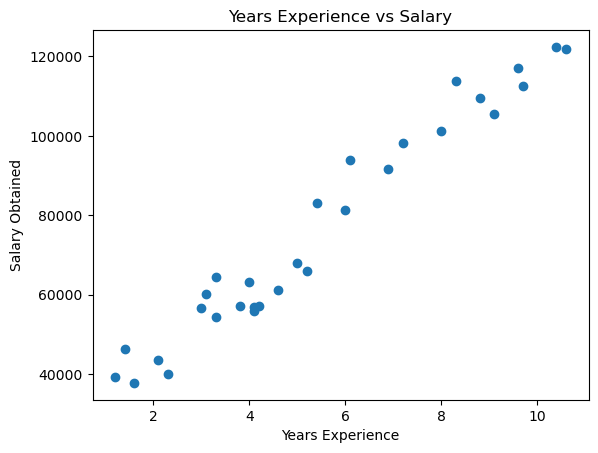

In [7]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary Obtained')
plt.title('Years Experience vs Salary')
plt.show()

In [8]:
X = df[['YearsExperience']]
Y = df['Salary']

In [9]:
X ,Y

(    YearsExperience
 0               1.2
 1               1.4
 2               1.6
 3               2.1
 4               2.3
 5               3.0
 6               3.1
 7               3.3
 8               3.3
 9               3.8
 10              4.0
 11              4.1
 12              4.1
 13              4.2
 14              4.6
 15              5.0
 16              5.2
 17              5.4
 18              6.0
 19              6.1
 20              6.9
 21              7.2
 22              8.0
 23              8.3
 24              8.8
 25              9.1
 26              9.6
 27              9.7
 28             10.4
 29             10.6,
 0      39344.0
 1      46206.0
 2      37732.0
 3      43526.0
 4      39892.0
 5      56643.0
 6      60151.0
 7      54446.0
 8      64446.0
 9      57190.0
 10     63219.0
 11     55795.0
 12     56958.0
 13     57082.0
 14     61112.0
 15     67939.0
 16     66030.0
 17     83089.0
 18     81364.0
 19     93941.0
 20     91739.0
 21     9827

# Train test split


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [11]:
X_train.shape , X_test.shape , Y_train.shape, Y_test.shape

((24, 1), (6, 1), (24,), (6,))

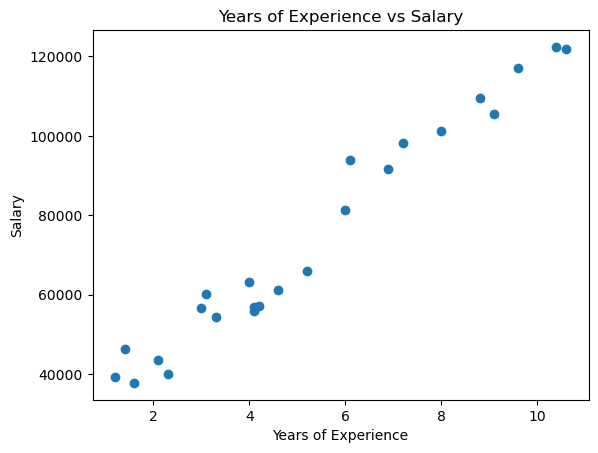

In [14]:
plt.scatter(X_train, Y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()


# Let us train the model using Simple Linear Regression
Simple Linear Regression is a supervised machine learning algorithm used to predict a continuous numerical value based on one independent variable.

It tries to find a straight-line relationship between:

X → input / independent variable (e.g., years of experience)

Y → output / dependent variable (e.g., salary)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
model.fit(X_train, Y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
print("The slope or coeffiecient of weight is:",model.coef_)
print("The intercept of the line is :", model.intercept_)

The slope coeffiecient of weight is: [9423.81532303]
The intercept of the line is : 24380.20147947369


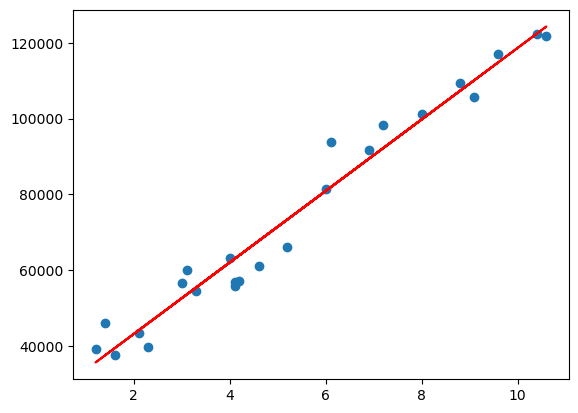

In [21]:
plt.scatter(X_train, Y_train)
plt.plot(X_train,model.predict(X_train),'r')

plt.show()

In [22]:
Y_pred_test = model.predict(X_test)


In [23]:
Y_pred_test, Y_test

(array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
         55478.79204548,  60190.69970699]),
 27    112636.0
 15     67939.0
 23    113813.0
 17     83089.0
 8      64446.0
 9      57190.0
 Name: Salary, dtype: float64)

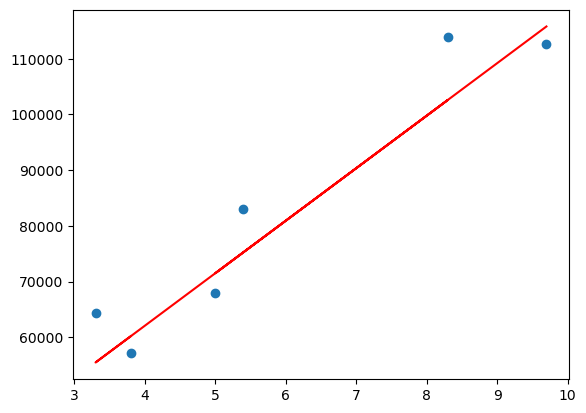

In [25]:
plt.scatter(X_test,Y_test)
plt.plot(X_test, model.predict(X_test),'r')

plt.show()

# Performance metrics 
Mean Squared Errors : MSE measures the average of the squared differences between actual and predicted values.

-MSE punishes bigger errors much more because it squares them.

-It is useful when you want the model to avoid large mistakes.

Mean Absolute Error : MAE measures the average of all the absolute differences between actual and predicted values.

-It tells you how wrong the predictions are on average.

-It treats all errors equally—no extra punishment for big mistakes



In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred_test)
mae= mean_absolute_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)
print("Mean absolute error: ", mae)

Mean squared error:  49830096.855908334
Root mean squared error:  7059.043621901506
Mean absolute error:  6286.453830757745


In [28]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred_test)
print("R-squared score: ", score * 100, '%')
     

R-squared score:  90.24461774180497 %


In [29]:
adjusted_r2_score = 1-(1-score) * (len(Y_test)-1) / (len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2 score: ", adjusted_r2_score*100,'%')

Adjusted R2 score:  87.80577217725623 %


# Final test on the model 

In [30]:
new_data =[[8]]
print("The salary of the person who has worked for 8 years is:",model.predict(new_data))

The salary of the person who has worked for 8 years is: [99770.72406372]


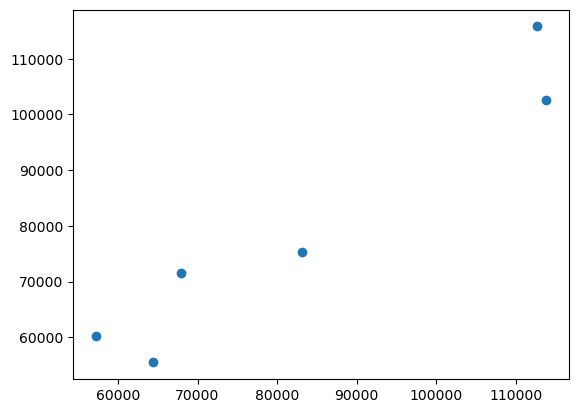

In [31]:
plt.scatter(Y_test,Y_pred_test)

In [32]:
residuals = Y_test - Y_pred_test
print(residuals)

27    -3155.210113
15    -3560.278095
23    11215.131339
17     7820.195776
8      8967.207955
9     -3000.699707
Name: Salary, dtype: float64


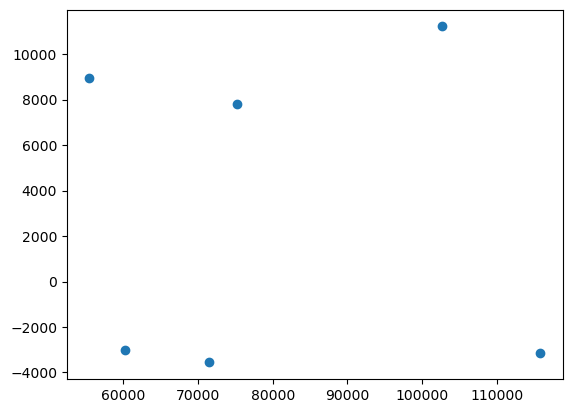

In [33]:
## Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(Y_pred_test, residuals)